# Рубежный контроль 2

## Рыбина Арина ИУ5-63б

## Задание

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Датасет: https://www.kaggle.com/mathan/fifa-2018-match-statistics

Описание датасета:
В данном датасете бъединены общедоступные данные, чтобы увидеть, как мир науки о данных использует их, чтобы обнаружить интересные закономерности. Данные взяты из официального приложения Чемпионата мира по футболу FIFA 2018 в России.
Данные будут обновляться после каждого матча ежедневно.

Примечание. В столбце «1-й гол» любой гол, забитый в дополнительное время, будет обозначен как 45 или 90 в зависимости от 1-й или 2-й половины игры (например, если 1-й гол был забит в течение 45+2 минут, то он будет указано как 45 вместо 47, аналогично для 2-й половины)

## Методы:
1. Случайный лес
2. Дерево решений

In [1]:
from sklearn.datasets import *
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("FIFA 2018 Statistics.csv", sep=",")

In [3]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [28]:
data.PSO.replace(['No', 'Yes'], [0, 1], inplace=True) 
data.Man of the Match.replace(['No', 'Yes'], [0, 1], inplace=True) 

SyntaxError: invalid syntax (2325743013.py, line 2)

In [5]:
data.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                         int64
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [6]:
data.shape

(128, 27)

## Проверим, содержатся ли пропуски в данных:

In [7]:
print('Количество пропущенных значений')
data. isnull().sum()

Количество пропущенных значений


Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data. isnull().sum()

Date                      0
Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
Own goals                 0
Own goal Time             0
dtype: int64

In [27]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,0,0,1.0,81.0
30,19-06-2018,Poland,Senegal,1,57,10,4,5,1,3,...,1,0,0,No,37.0,Group Stage,0,0,1.0,37.0
33,19-06-2018,Egypt,Russia,1,53,13,1,8,4,4,...,1,0,0,No,47.0,Group Stage,0,0,1.0,47.0
86,27-06-2018,Switzerland,Costa Rica,2,60,12,3,5,4,6,...,3,0,0,Yes,31.0,Group Stage,0,0,1.0,90.0
93,28-06-2018,Tunisia,Panama,2,64,15,7,4,4,6,...,3,0,0,Yes,51.0,Group Stage,0,0,1.0,33.0


В нашем датасете все пропуски удалены.

In [10]:
data_cut = data.drop(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round'], axis=1)

In [11]:
data_cut.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,PSO,Goals in PSO,Own goals,Own goal Time
9,1,49,4,1,2,1,1,0,16,4,...,111,19,3,0,0,62.0,0,0,1.0,81.0
30,1,57,10,4,5,1,3,3,18,1,...,110,8,1,0,0,37.0,0,0,1.0,37.0
33,1,53,13,1,8,4,4,0,11,1,...,110,10,1,0,0,47.0,0,0,1.0,47.0
86,2,60,12,3,5,4,6,1,15,5,...,103,9,3,0,0,31.0,0,0,1.0,90.0
93,2,64,15,7,4,4,6,1,22,4,...,107,19,3,0,0,51.0,0,0,1.0,33.0


In [12]:
data_cut.dtypes

Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
1st Goal                  float64
PSO                         int64
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [13]:
data['Blocked'].unique()

array([1, 4, 2])

In [14]:
# Разделение признаков
x = data_cut.drop("Blocked", axis=1)
y = data_cut['Blocked']

## Дерево решений

In [15]:
# Построение модели
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [16]:
# Оценка модели
model.score(x,y)

1.0

[Text(0.4, 0.8333333333333334, 'X[5] <= 3.5\nentropy = 1.449\nsamples = 7\nvalue = [3, 1, 3]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.6, 0.5, 'X[20] <= 22.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]')]

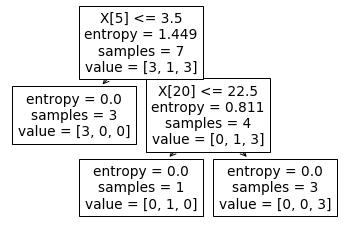

In [17]:
# Визуализирование данных
tree.plot_tree(model)

In [18]:
# Разделим данные
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [26]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [20]:
y_pred = regressor.predict(x_test)
print('Дерево решений\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Дерево решений

Mean Absolute Error: 1.0
Mean Squared Error: 1.6666666666666667
Root Mean Squared Error: 1.2909944487358056


In [21]:
# Доля правильных ответов в обучающей и тестовой выборке
print('Дерево решений\n')
print("Accuracy on training set: {:.3f}".format(regressor.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regressor.score(x_test, y_test)))

Дерево решений

Accuracy on training set: 1.000
Accuracy on test set: 0.167


## Случайный лес

In [22]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [23]:
y_pred = regressor.predict(x_test)
print('Случайный лес\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Случайный лес

Mean Absolute Error: 1.7333333333333334
Mean Squared Error: 3.1650000000000005
Root Mean Squared Error: 1.7790446874657198


In [24]:
# Доля правильных ответов в обучающей и тестовой выборке
print('Случайный лес\n')
print("Accuracy on training set: {:.3f}".format(regressor.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(regressor.score(x_test, y_test)))

Случайный лес

Accuracy on training set: 0.817
Accuracy on test set: -0.583
